In [163]:
# Group 1 project for Business Analytics
# Here we will look at how to import powerful python libraries and analyse our auto industry dataset.

import numpy as np # linear algebra
import pandas as pd # data processing


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [164]:
# We are reading the Training file, to understand and train the data using appropriate models
data = pd.read_csv("Train.csv")

# Exploratory Data Analysis

In [165]:
# We are just opening the initial 5 rows of the dataset to get a feel of what the fields are and their values.
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Dealing with Missing values 

In [167]:
data_copy.isnull().sum()*100/len(data)

Gender             0.0
Ever_Married       0.0
Age                0.0
Graduated          0.0
Profession         0.0
Work_Experience    0.0
Spending_Score     0.0
Family_Size        0.0
Var_1              0.0
Segmentation       0.0
dtype: float64

In [168]:
# Making a copy of the original dataframe before making any manipulations for later reference 
data_copy = data.copy()
data_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [169]:
data_copy.dropna(inplace=True)

In [170]:
data_copy.reset_index(drop=True, inplace=True)
data_copy.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [171]:
data_copy.drop("ID", axis=1, inplace=True)
data_copy.shape

(6665, 10)

# Basic Visualizations

In [122]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns 


segmentation_order = ['A', 'B', 'C', 'D']
def countplot(x, hue, data, order, title, fig_size):
  fig, ax = plt.subplots(figsize= fig_size)
  sns.countplot(x=x, hue=hue, ax=ax, data=data, order=order, palette= 'bright')
  ax.set_title(title)
  plt.show()

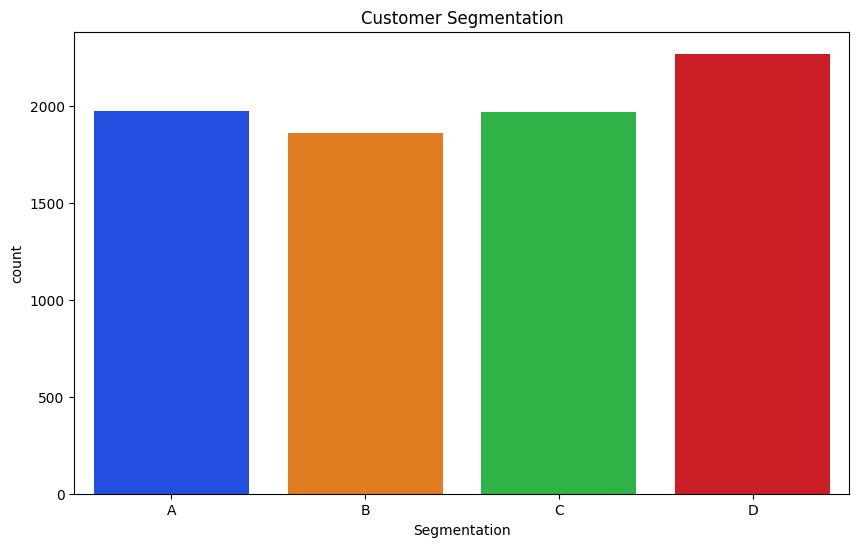

In [123]:
countplot('Segmentation', None, data, segmentation_order, 'Customer Segmentation', (10,6))

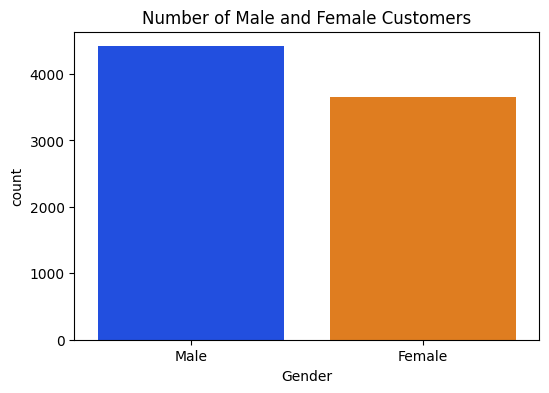

In [124]:
countplot('Gender', None, data, None, 'Number of Male and Female Customers', (6,4))

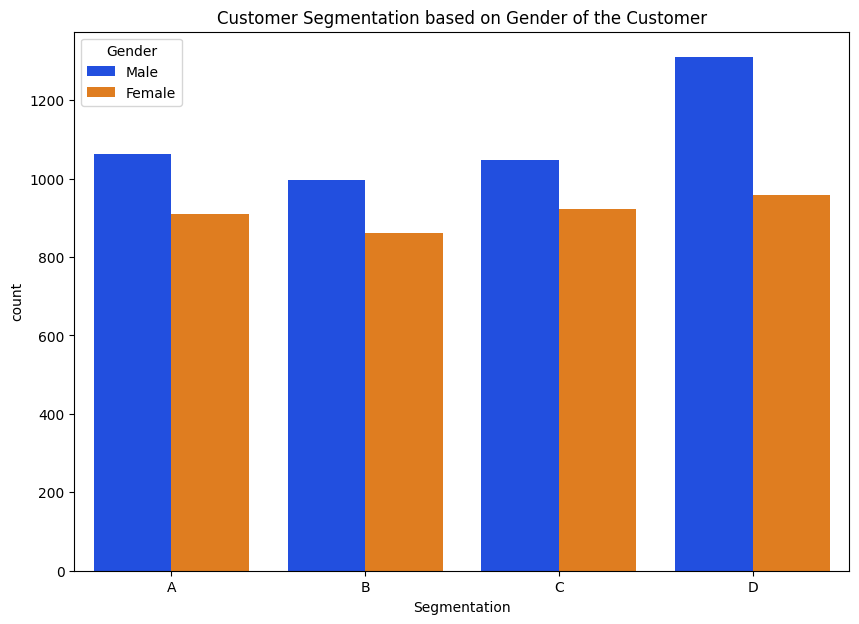

In [125]:
countplot('Segmentation', 'Gender', data, segmentation_order, 'Customer Segmentation based on Gender of the Customer', (10,7))

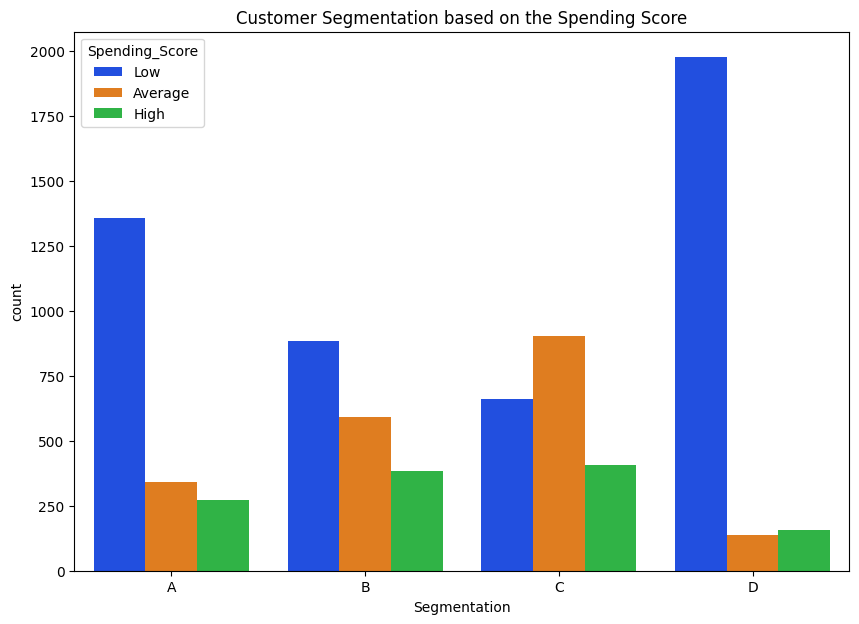

In [126]:
countplot('Segmentation', 'Spending_Score', data, segmentation_order, 'Customer Segmentation based on the Spending Score', (10,7))

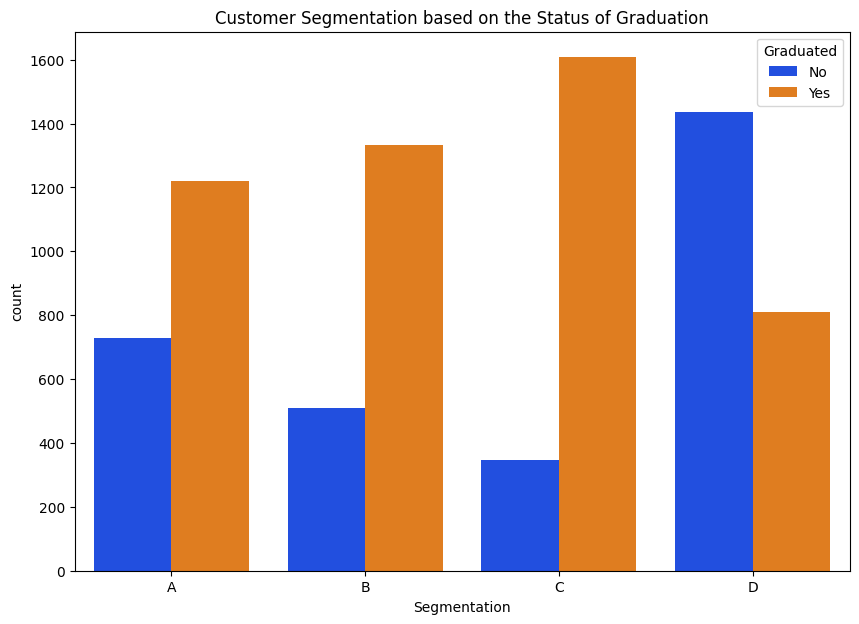

In [127]:
countplot('Segmentation', 'Graduated', data, segmentation_order, 'Customer Segmentation based on the Status of Graduation', (10,7))

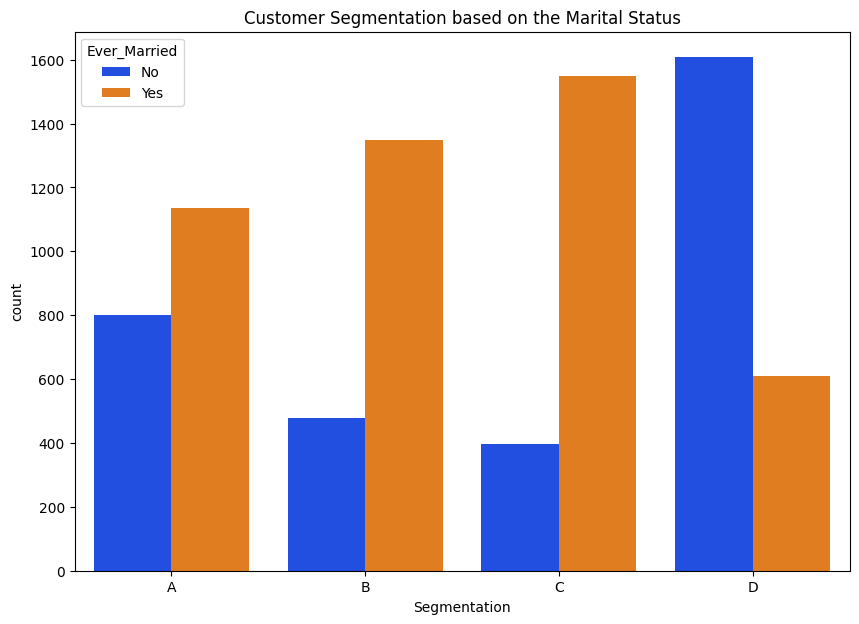

In [128]:
countplot('Segmentation', 'Ever_Married', data, segmentation_order, 'Customer Segmentation based on the Marital Status', (10,7))

In [129]:
# Since, the data have categorical values, changing them into numericals with Label encoding 

from sklearn.preprocessing import LabelEncoder

cat = ["Ever_Married", "Graduated","Gender", "Profession", "Spending_Score", "Var_1", 'Segmentation']
for i in cat:
  le = LabelEncoder()
  labels = le.fit_transform(data_copy[i])
  data_copy.drop(i, axis=1, inplace=True)
  data_copy[i]= labels
data_copy.head()


,Age,Work_Experience,Family_Size,Ever_Married,Graduated,Gender,Profession,Spending_Score,Var_1,Segmentation
0,22,1.0,4.0,0,0,1,5,2,3,3
1,67,1.0,1.0,1,1,0,2,2,5,1
2,67,0.0,2.0,1,1,1,7,1,5,1
3,56,0.0,2.0,1,0,1,0,0,5,2
4,32,1.0,3.0,0,1,1,5,2,5,2


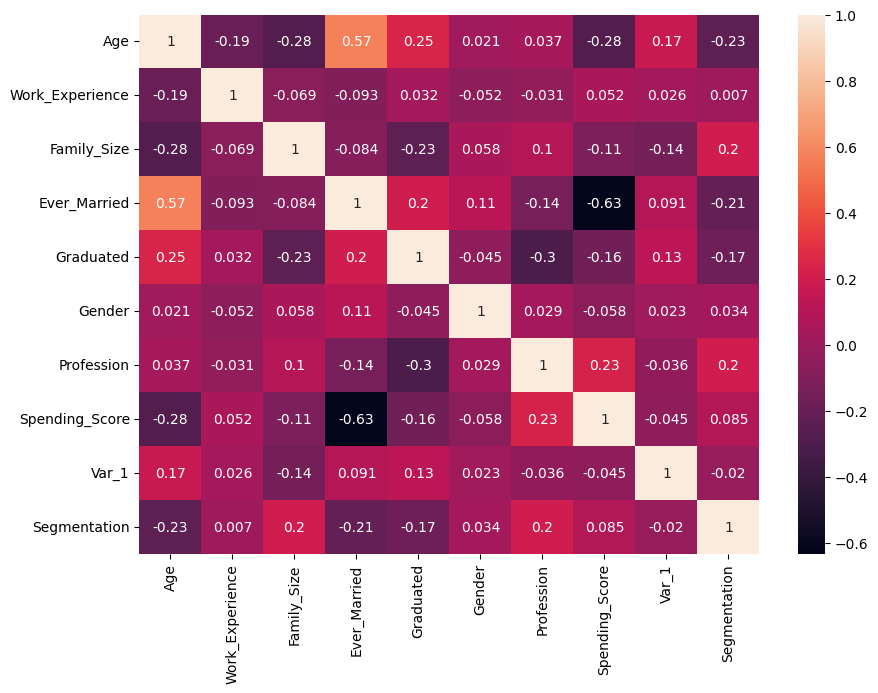

In [130]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(data_copy.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
# As we can see, there isn't much correlation between the features.

# Modelling

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [132]:
x = data_copy.drop('Segmentation', axis=1)
y = data_copy.Segmentation.values

In [133]:
x.head()

,Age,Work_Experience,Family_Size,Ever_Married,Graduated,Gender,Profession,Spending_Score,Var_1
0,22,1.0,4.0,0,0,1,5,2,3
1,67,1.0,1.0,1,1,0,2,2,5
2,67,0.0,2.0,1,1,1,7,1,5
3,56,0.0,2.0,1,0,1,0,0,5
4,32,1.0,3.0,0,1,1,5,2,5


In [134]:
y

array([3, 1, 1, ..., 3, 1, 1])

In [135]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [136]:
x_train.shape, y_train.shape

((5332, 9), (5332,))

In [137]:
x_test.shape, y_test.shape

((1333, 9), (1333,))

# Now, lets try fitting three different models and see the results

In [138]:
models = {"KNN": KNeighborsClassifier(),
          "Random_Forest": RandomForestClassifier(),
          "Logistic_Regression": LogisticRegression(solver='liblinear')}

def fit_and_score_models(model, x_train, x_test, y_train, y_test):

  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [139]:
model_scores = fit_and_score_models(models, x_train, x_test, y_train, y_test)
model_scores

{'KNN': 0.4696174043510878,
 'Random_Forest': 0.48687171792948236,
 'Logistic_Regression': 0.5033758439609902}

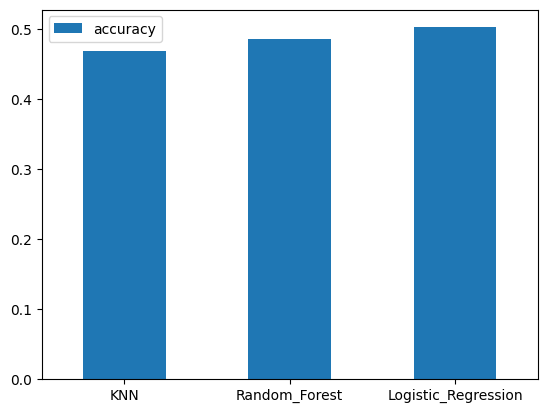

In [140]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar')
plt.xticks(rotation=0);

As, we can see, our Logistic Regression model is performing relatively well than the other models...

Now, let us see some evaluation metrics for our best performed model

In [141]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5033758439609902

In [172]:
# Creating a final dataframe which will contain the precison, recall, f1-score and support scores respectively for the
# KNN, Random Forest and Logistic Regression algorithm.

y_preds = model.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.41      0.44      0.43       315
           1       0.38      0.10      0.16       302
           2       0.49      0.65      0.56       346
           3       0.60      0.75      0.67       370

    accuracy                           0.50      1333
   macro avg       0.47      0.49      0.45      1333
weighted avg       0.48      0.50      0.47      1333



In [ ]:
# With the available data, this is a good prediction.